In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data.csv')
df = pd.DataFrame(data)

C:\Users\tnels\AppData\Local\Temp\ipykernel_16804\791051794.py:1: DtypeWarning: Columns (17,45,53) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  int64  
 3   funded_amnt                  855969 non-null  int64  
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [5]:
df.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
total_rev_hi_lim     67313
inq_fi              842681
total_cu_tl         842681
inq_last_12m        842681
default_ind              0
Length: 73, dtype: int64

In [6]:
df2 = df[['default_ind', 'addr_state', 'annual_inc', 'pymnt_plan', 'id', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade']]
df2['loan_to_inc'] = df2['loan_amnt'] / df2['annual_inc']
df['term'] = df['term'].astype(str)
df['term'] = df['term'].str.replace(' months', '').astype(int)
df2['loan_to_term'] = df2['loan_amnt'] / df2['term']

C:\Users\tnels\AppData\Local\Temp\ipykernel_16804\3000667629.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['loan_to_inc'] = df2['loan_amnt'] / df2['annual_inc']


TypeError: unsupported operand type(s) for /: 'int' and 'str'

In [ ]:
paid = df2[df2['default_ind'] == 0]
default = df2[df2['default_ind'] == 1]

In [ ]:
paid.head()

In [ ]:
print('The average loan amount defaulted is', default['loan_amnt'].sum()/default['loan_amnt'].count(), ', whereas the average amount of a paid loan is', paid['loan_amnt'].sum()/paid['loan_amnt'].count())

In [ ]:
print('the average ratio of loan to income on defaulted loans is', default['loan_to_inc'].sum()/default['loan_to_inc'].count(), ', whereas the average ratio for a paid loan is', paid['loan_to_inc'].sum()/paid['loan_to_inc'].count())

In [ ]:
print('the average loan to term ratio for defaulted loans is', default['loan_to_term'].sum()/default['loan_to_term'].count(), ', whereas the average for paid loans is', paid['loan_to_term'].sum()/paid['loan_to_term'].count())

In [ ]:
grade_counts = paid['grade'].value_counts()

print("Grade A:", grade_counts.get('A', 0))
print("Grade B:", grade_counts.get('B', 0))
print("Grade C:", grade_counts.get('C', 0))
print("Grade D:", grade_counts.get('D', 0))
print("Grade E:", grade_counts.get('E', 0))

In [ ]:
def_grade_counts = default['grade'].value_counts()

print("Grade A:", def_grade_counts.get('A', 0))
print("Grade B:", def_grade_counts.get('B', 0))
print("Grade C:", def_grade_counts.get('C', 0))
print("Grade D:", def_grade_counts.get('D', 0))
print("Grade E:", def_grade_counts.get('E', 0))

Because we have many more paid loans than defaulted, I am going to pull loans from the paid dataframe to match the length of the defaulted. Because there is no particular order to the loans, I am going to pull the rows in a single block rather than shuffle through them more randomly.

In [ ]:
default.value_counts().sum()

In [ ]:
paid2 = paid
paid = paid.loc[0:46466]
paid.head()

Now we will run some visualizations to begin to eyeball the different ratios among variables between the categories

In [7]:
numpaid = paid[['annual_inc', 'loan_amnt', 'term', 'int_rate', 'installment', 'loan_to_inc', 'loan_to_term']]
numdef = default[['annual_inc', 'loan_amnt', 'term', 'int_rate', 'installment', 'loan_to_inc', 'loan_to_term']]

NameError: name 'paid' is not defined

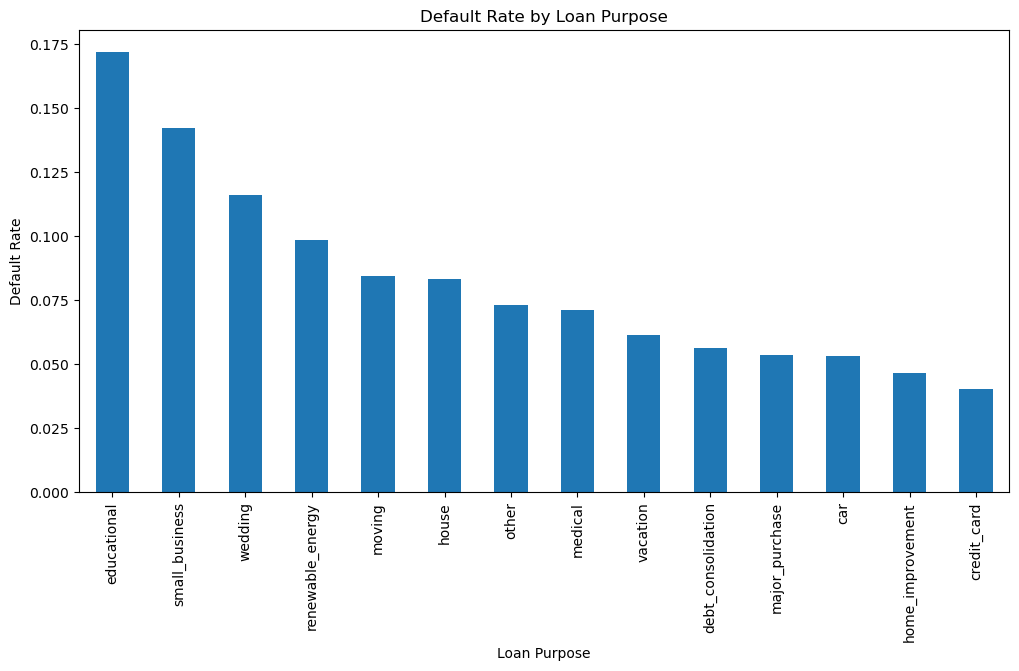

In [8]:
default_rate = df[df['default_ind'] == 1].groupby('purpose').size() / df.groupby('purpose').size()
default_rate.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Default Rate by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Default Rate')
plt.show()

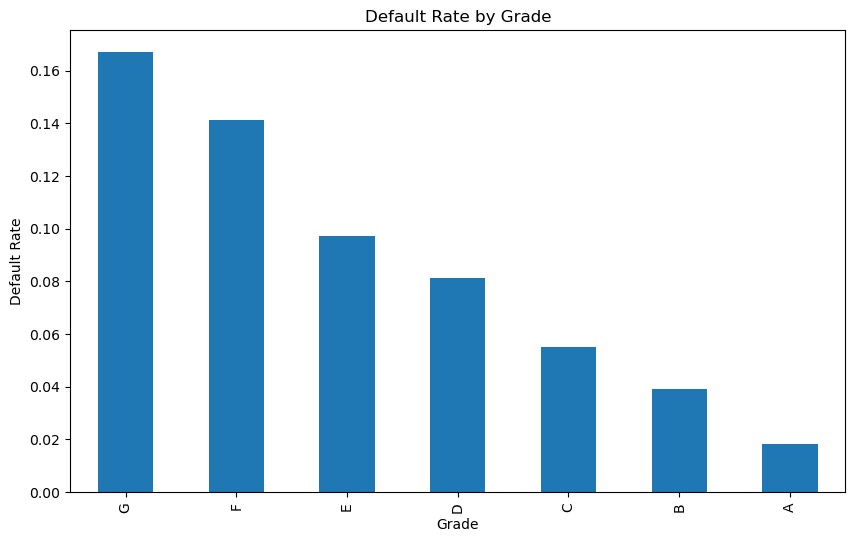

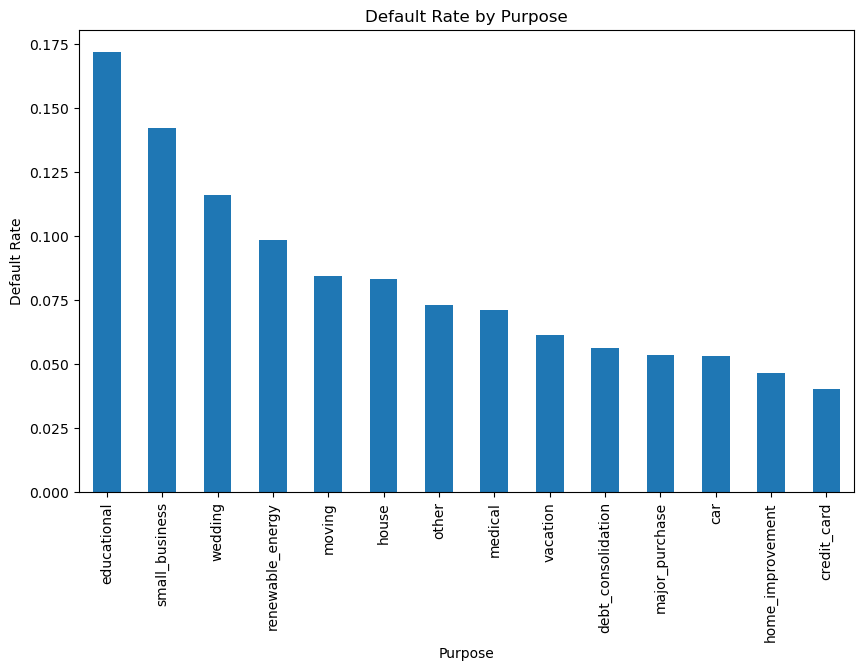

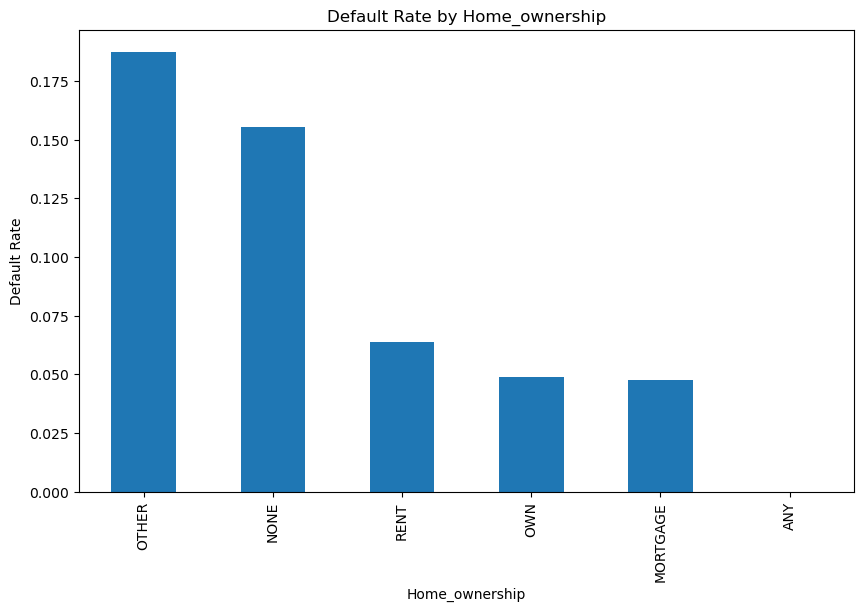

In [9]:
categorical_features = ['grade', 'purpose', 'home_ownership']

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    default_rate = df.groupby(feature)['default_ind'].mean()
    default_rate.sort_values(ascending=False).plot(kind='bar')
    plt.title(f'Default Rate by {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Default Rate')
    plt.show()

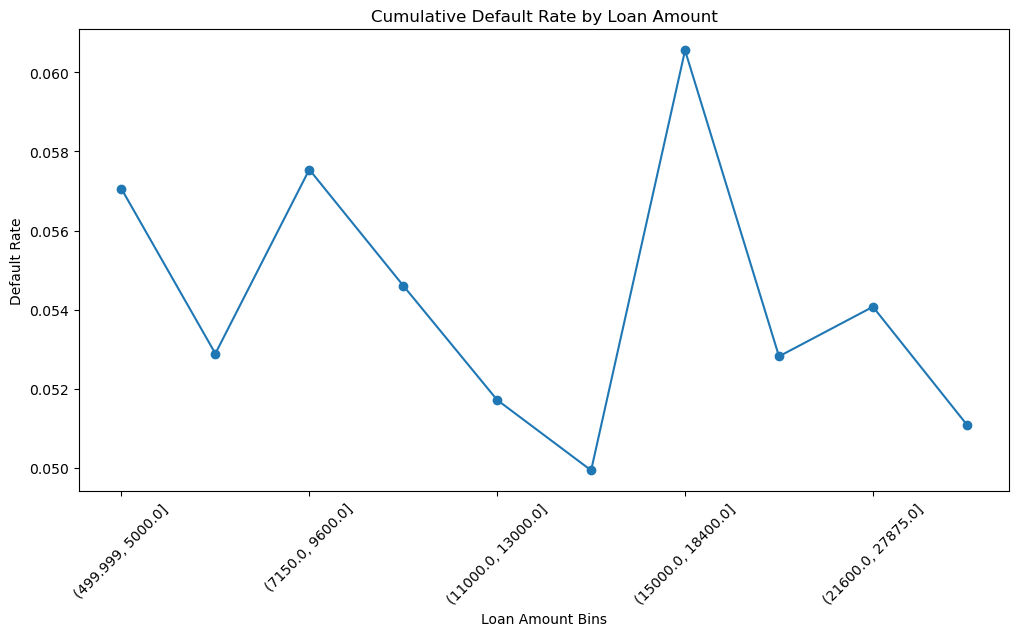

In [10]:
df['loan_amnt_bins'] = pd.qcut(df['loan_amnt'], 10)  # Create bins of loan amounts
loan_amount_default_rate = df.groupby('loan_amnt_bins')['default_ind'].mean()

plt.figure(figsize=(12, 6))
loan_amount_default_rate.plot(kind='line', marker='o')
plt.title('Cumulative Default Rate by Loan Amount')
plt.xlabel('Loan Amount Bins')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.show()

In [11]:
plt.figure(figsize=(10, 6))

# Assuming df2 contains the 'loan_to_term' column
df2['loan_to_term_bins'] = pd.qcut(df2['loan_to_term'], 10)  # Bin the loan-to-term ratio
loan_to_term_default_rate = df2.groupby('loan_to_term_bins')['default_ind'].mean()

loan_to_term_default_rate.plot(kind='bar')
plt.title('Default Rate by Loan-to-Term Ratio')
plt.xlabel('Loan-to-Term Ratio Bins')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.show()

KeyError: 'loan_to_term'

<Figure size 1000x600 with 0 Axes>